In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import pandas as pd
import seaborn as sns

In [49]:
from sklearn.datasets import make_blobs
data = make_blobs(n_samples = 100, n_features = 2, centers = 2, random_state = 111 )

In [50]:
blobs = data[0]

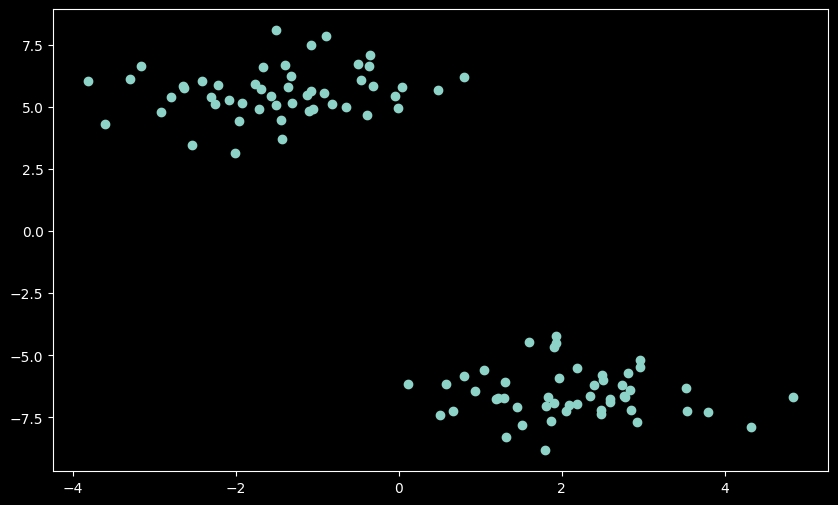

In [51]:
plt.figure(figsize = (10,6))
plt.scatter(blobs[:,0],blobs[:,1])

In [52]:
X1 = np.array([-2,-2])
X2 = np.array([0,0])
X3 = np.array([2,1.5])
X4 = np.array([4,5])
X5 = np.array([-4,-5.5])

In [53]:
X = np.vstack((blobs,X1,X2,X3,X4,X5))

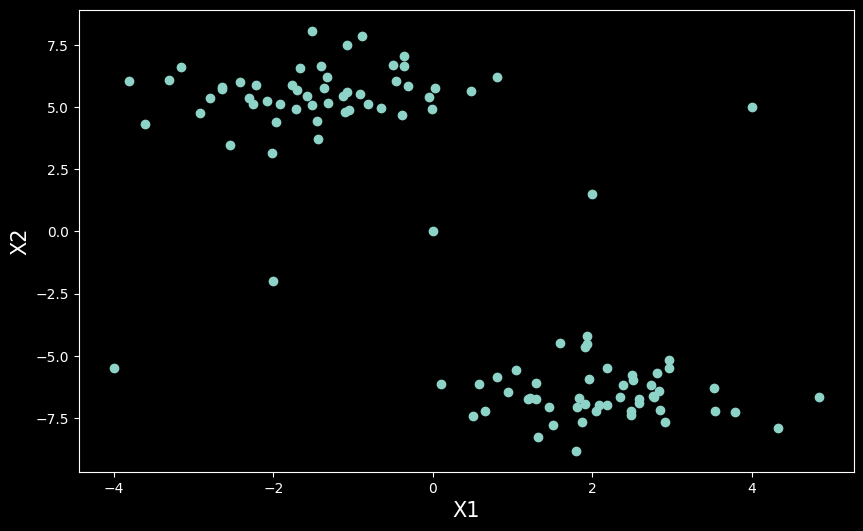

In [54]:
plt.figure(figsize = (10,6))
plt.scatter(X[:,0],X[:,1])
plt.xlabel('X1', fontsize = 15)
plt.ylabel('X2', fontsize = 15)
plt.show()

## Selecting Value of Epsilon

In [55]:
from sklearn.cluster import DBSCAN

In [56]:
dbscan =DBSCAN(eps=1) # changing epsilon from 0.01, 0.5, 1
y_pred = dbscan.fit_predict(X)

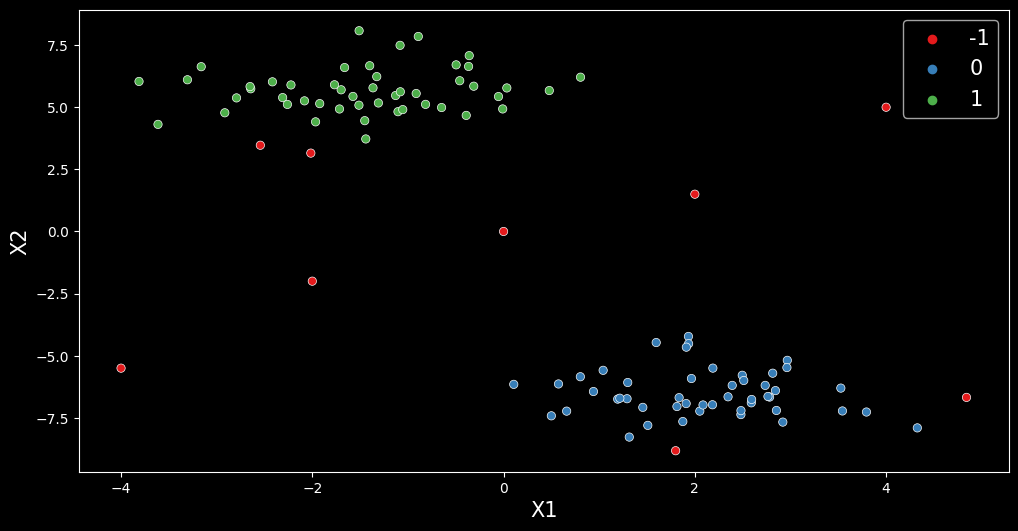

In [57]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = X, x = X[:,0],y = X[:,1] ,hue = y_pred ,palette = 'Set1')
#plt.title('For epsilon ( = 0.01 ) there is a single cluster', fontsize = 20)
plt.xlabel('X1', fontsize = 15)
plt.ylabel('X2', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [58]:
outliers = []
eps_range = np.linspace(0.001,1,1000)

for eps in eps_range:
    
    dbscan = DBSCAN(eps=eps)
    y_pred = dbscan.fit_predict(X)
    
    points = 100 * np.sum(y_pred == -1)/len(y_pred)
    
    outliers.append(points)

Text(0.5, 1.0, 'Selecting Values of Epsilon')

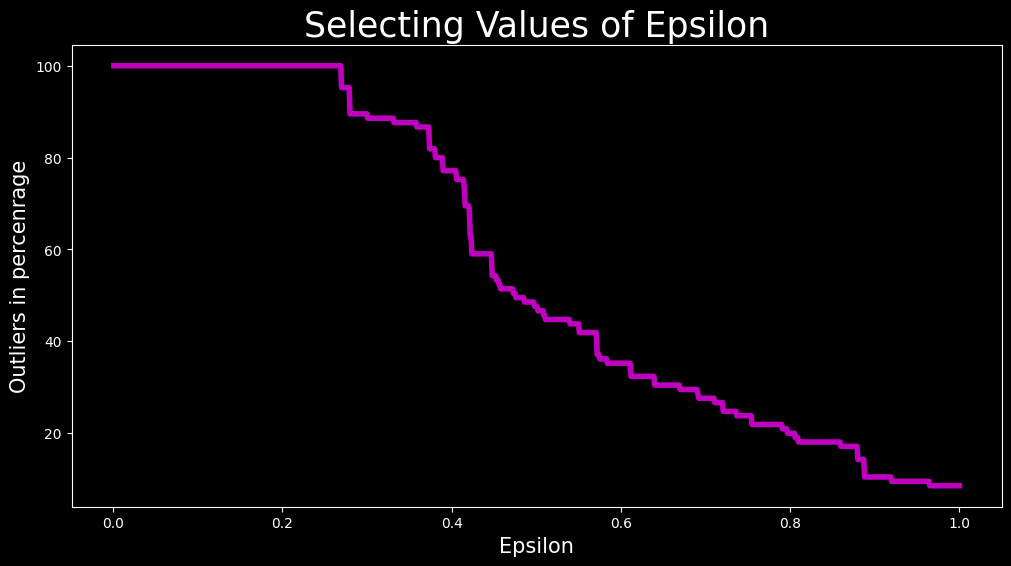

In [59]:
plt.figure(figsize = (12,6))
plt.plot( eps_range, outliers,'m', lw = 4)
plt.ylabel("Outliers in percenrage", fontsize = 15)
plt.xlabel("Epsilon", fontsize = 15)
plt.title("Selecting Values of Epsilon", fontsize = 25)

## Selecting Minimum samples for clusters

In [60]:
samp_outliers = []
samples_range = np.arange(1,11)

for samples in samples_range :
    
    dbscan = DBSCAN(min_samples = samples)
    y_pred = dbscan.fit_predict(X)
    
    points = 100 * np.sum(y_pred == -1)/len(y_pred)
    
    samp_outliers.append(points)

(1.0, 10.0)

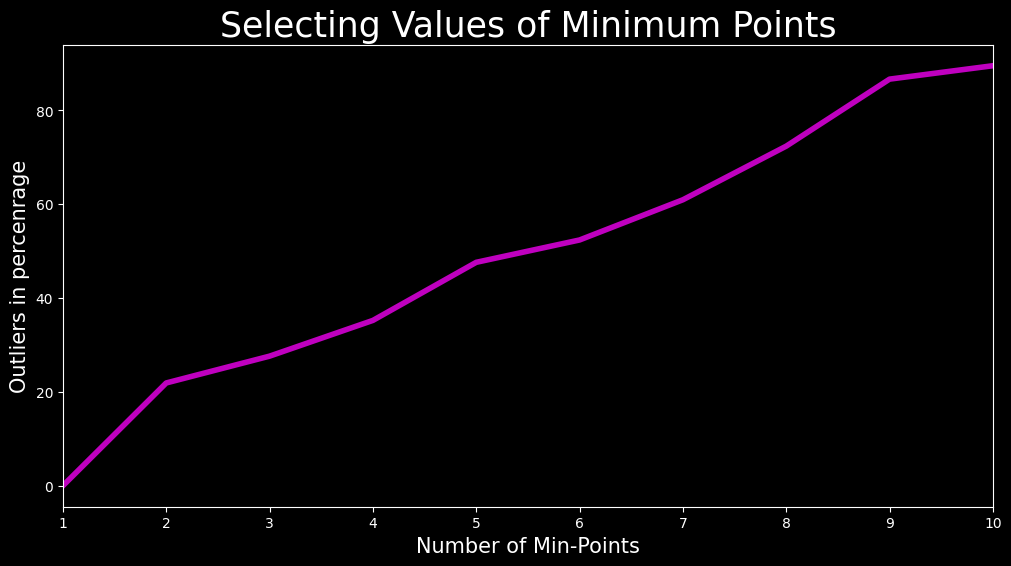

In [61]:
plt.figure(figsize = (12,6))
plt.plot(samples_range, samp_outliers,'m', lw = 4)
plt.ylabel("Outliers in percenrage", fontsize = 15)
plt.xlabel("Number of Min-Points", fontsize = 15)
plt.title("Selecting Values of Minimum Points", fontsize = 25)
plt.xlim([1,10])

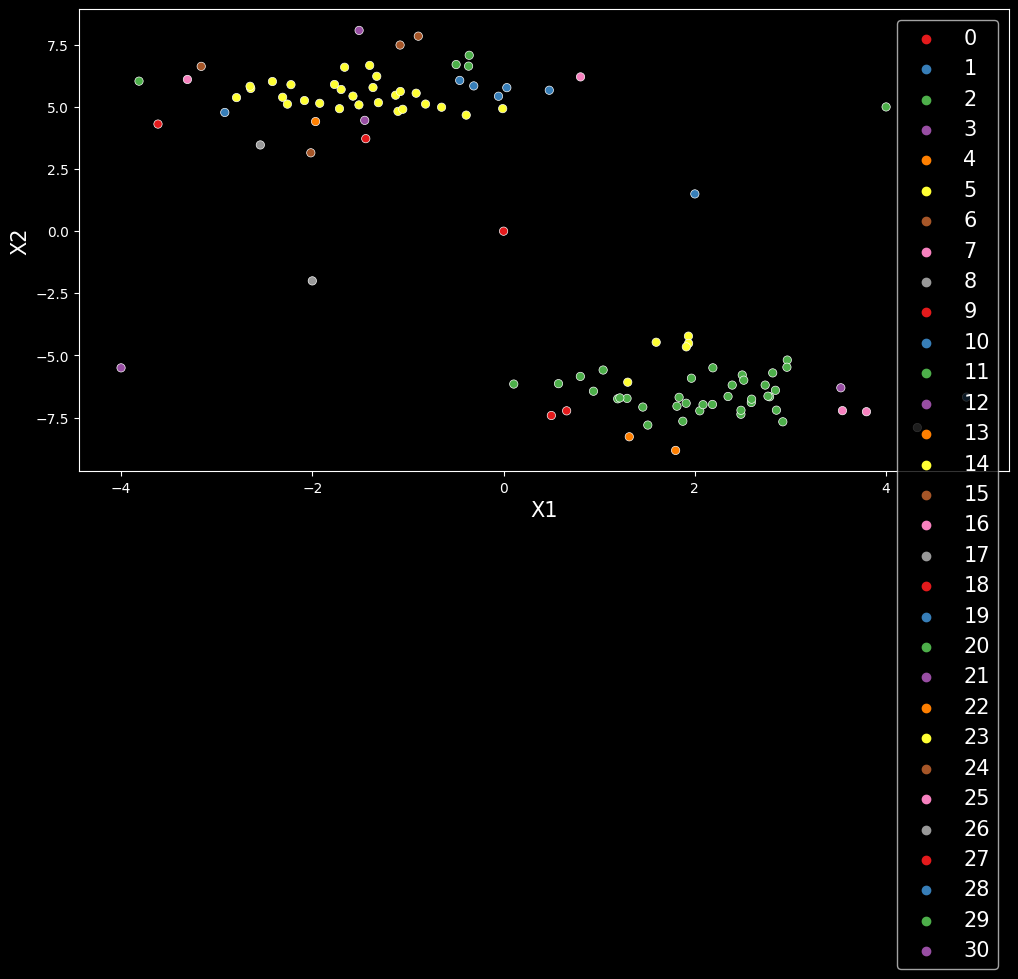

In [62]:
dbscan = DBSCAN(min_samples = 1) # Use min_samples = 10,5,1 
y_pred = dbscan.fit_predict(X)
plt.figure(figsize = (12,6))
sns.scatterplot(data = X, x = X[:,0],y = X[:,1] ,hue = y_pred ,palette = 'Set1')
#plt.title('For min_samples ( = 1 ) there are only clusters and no outlier', fontsize = 20)
plt.xlabel('X1', fontsize = 15)
plt.ylabel('X2', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

----